<a href="https://colab.research.google.com/github/ilanmoshe52/Final_Project/blob/main/Wavelets_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pywt
from pywt import wavedec
from skimage.restoration import denoise_wavelet
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [4]:
np.transpose(pywt.wavelist())

array(['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6',
       'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9',
       'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3',
       'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1',
       'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8',
       'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14',
       'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5',
       'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14',
       'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22',
       'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30',
       'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38',
       'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5',
       'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1',
       'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8',
       'rbio

In [5]:
pywt.Modes.modes

['zero',
 'constant',
 'symmetric',
 'periodic',
 'smooth',
 'periodization',
 'reflect',
 'antisymmetric',
 'antireflect']

In [6]:
(a, d) = pywt.dwt([1,2,3,4,5,6], 'db2', 'smooth')
(a, d) = pywt.dwt([1,2,3,4,5,6], pywt.Wavelet('db2'), pywt.Modes.smooth)
a,d

(array([-0.51763809,  2.31078903,  5.13921616,  7.96764328]),
 array([0.00000000e+00, 1.66533454e-16, 3.33066907e-16, 2.22044605e-16]))

In [7]:
# Generate sample data for classification
import numpy as np

np.random.seed(0)
num_samples = 32
t = np.linspace(0, 1, num_samples, endpoint=False)
class_1_signal = np.sin(2 * np.pi * 5 * t)  # Class 1: Sine wave
class_2_signal = np.sin(2 * np.pi * 10 * t)  # Class 2: Higher frequency sine wave

# Combine signals with noise
noise_level = 0.5
y = class_1_signal + np.random.randn(num_samples) * noise_level

In [8]:
coeffs = wavedec(y, 'db1', level=2)

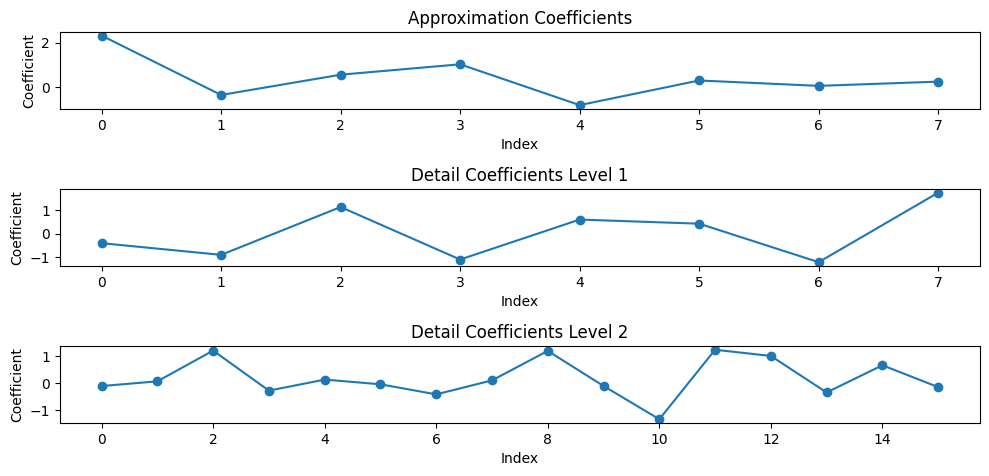

In [9]:
# Plot the coefficients
plt.figure(figsize=(10, 6))

# Plot approximation coefficients
plt.subplot(len(coeffs) + 1, 1, 1)
plt.plot(np.arange(len(coeffs[0])), coeffs[0], marker='o', linestyle='-')
plt.title('Approximation Coefficients')
plt.xlabel('Index')
plt.ylabel('Coefficient')

# Plot detail coefficients
for i in range(1, len(coeffs)):
    plt.subplot(len(coeffs) + 1, 1, i + 1)
    plt.plot(np.arange(len(coeffs[i])), coeffs[i], marker='o', linestyle='-')
    plt.title(f'Detail Coefficients Level {i}')
    plt.xlabel('Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()

# **Denoising example**

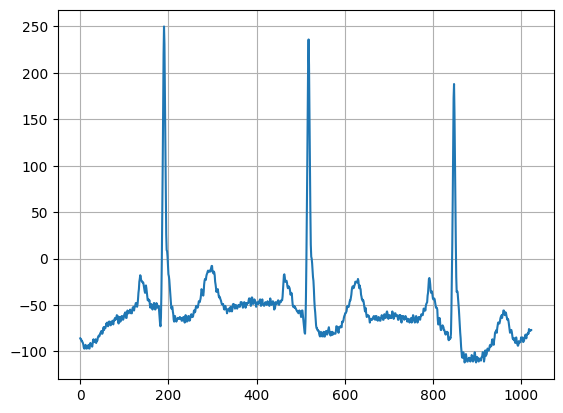

(1024,)

In [10]:
x = pywt.data.ecg()
plt.grid(True)
plt.plot(x)
plt.show()
x.shape

#### Add noise to the signal

In [11]:
noise_level = 5
noise = np.random.randn(x.shape[0]) * noise_level
y = x + noise

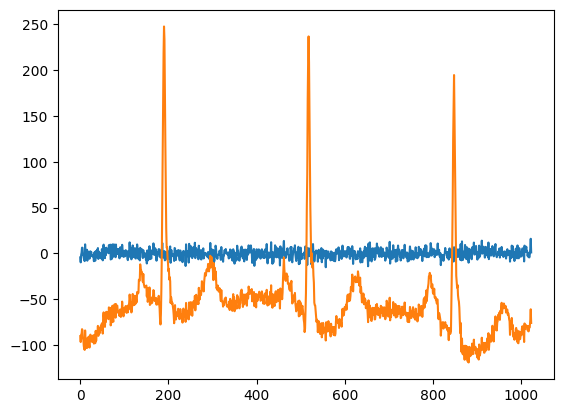

In [12]:
plt.plot(noise)
plt.plot(y)

In [13]:
y_denoise = denoise_wavelet(y,wavelet = 'db10')

(1024,)

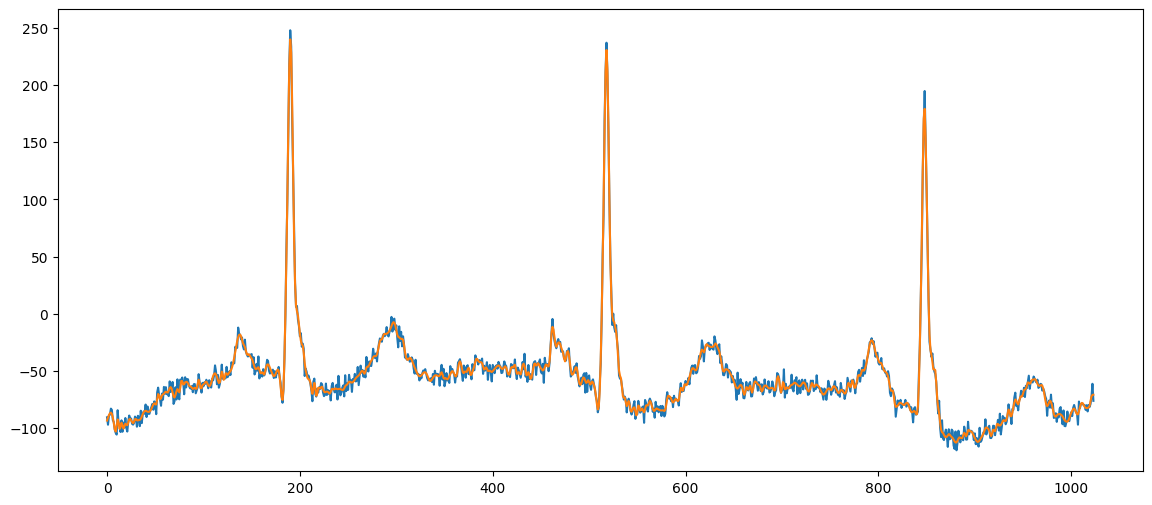

In [14]:
plt.figure(figsize=(14,6))
plt.plot(y)
plt.plot(y_denoise )
y_denoise.shape

# **DWT**

In [15]:
level=4
wavelet_type = 'db10'

coeffs = wavedec(y_denoise, wavelet_type, level=level)

In [16]:
len(coeffs) ,  len(coeffs[0]) , len(coeffs[1]) , len(coeffs[2]) , len(y_denoise)

(5, 81, 81, 144, 1024)

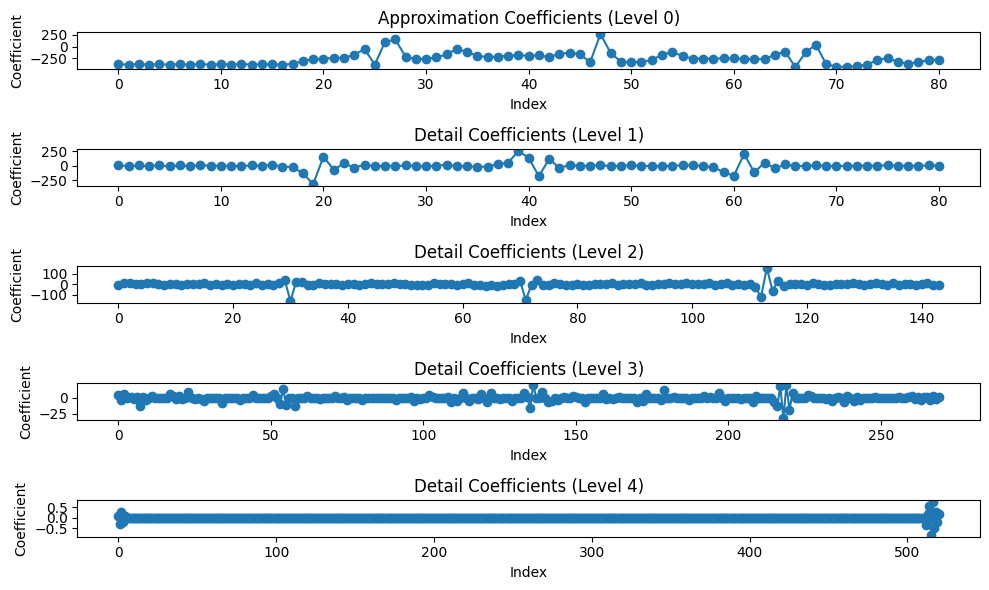

In [17]:
# Plot coefficients
plt.figure(figsize=(10, 6))

# Plot approximation coefficients
plt.subplot(level+1, 1, 1)
plt.plot(np.arange(len(coeffs[0])), coeffs[0], marker='o', linestyle='-')
plt.title('Approximation Coefficients (Level 0)')
plt.xlabel('Index')
plt.ylabel('Coefficient')

# Plot detail coefficients
for i in range(1, len(coeffs)):
    plt.subplot(level+1, 1, i+1)
    plt.plot(np.arange(len(coeffs[i])), coeffs[i], marker='o', linestyle='-')
    plt.title(f'Detail Coefficients (Level {i})')
    plt.xlabel('Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()

###**Testing filters**

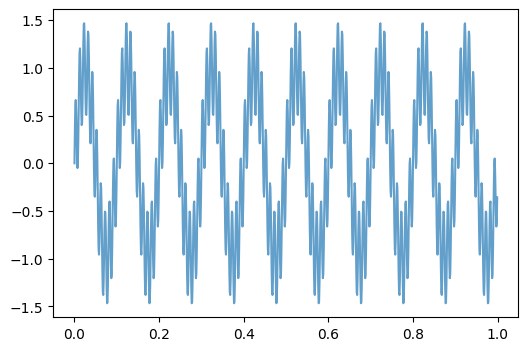

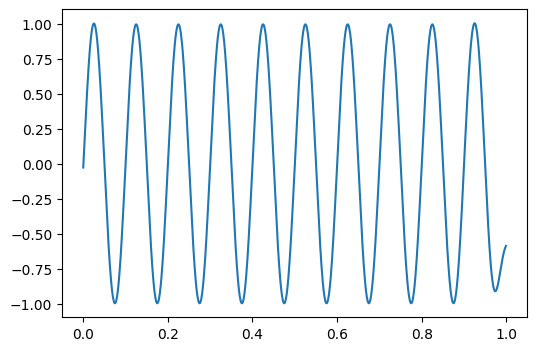

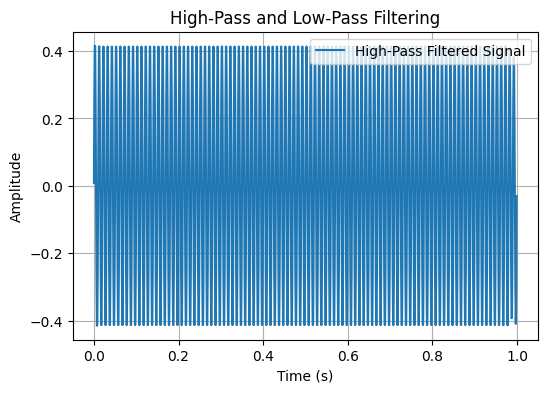

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate a test signal (e.g., a sine wave)
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
x = np.sin(2 * np.pi * 10 * t)  # 10 Hz sine wave
x += 0.5 * np.sin(2 * np.pi * 100 * t)  # 100 Hz sine wave (noise)

# Define the cutoff frequencies for high-pass and low-pass filters
low_cutoff = 20  # Low-pass filter cutoff frequency (Hz)
high_cutoff = 80  # High-pass filter cutoff frequency (Hz)

# Design low-pass and high-pass filters using Butterworth filter
order = 4  # Filter order
b_low, a_low = signal.butter(order, low_cutoff / (fs / 2), btype='low')  # Low-pass filter
b_high, a_high = signal.butter(order, high_cutoff / (fs / 2), btype='high')  # High-pass filter

# Apply low-pass filter
x_lowpass = signal.filtfilt(b_low, a_low, x)

# Apply high-pass filter
x_highpass = signal.filtfilt(b_high, a_high, x)

# Plot original and filtered signals
plt.figure(figsize=(6, 4))
plt.plot(t, x, label='Original Signal', alpha=0.7)
plt.figure(figsize=(6, 4))
plt.plot(t, x_lowpass, label='Low-Pass Filtered Signal')
plt.figure(figsize=(6, 4))
plt.plot(t, x_highpass, label='High-Pass Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('High-Pass and Low-Pass Filtering')
plt.legend()
plt.grid(True)
plt.show()


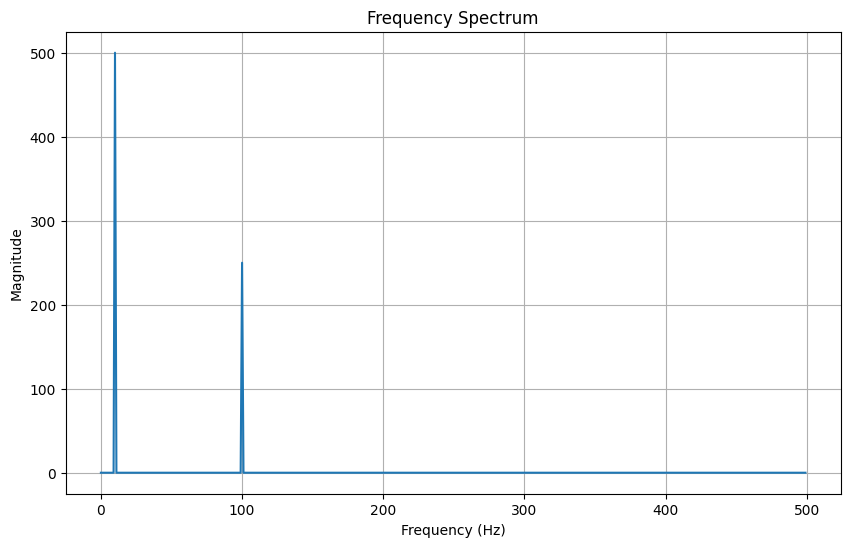

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = x #x_highpass  # x_lowpass #

# Compute the FFT
fft_result = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)  # Frequency bins

half = int(len(x)/2)
# Plot the FFT result
plt.figure(figsize=(10, 6))
plt.plot(freqs[:half], np.abs(fft_result[:half]))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


In [20]:
len(freqs) , len(x) , half

(1000, 1000, 500)

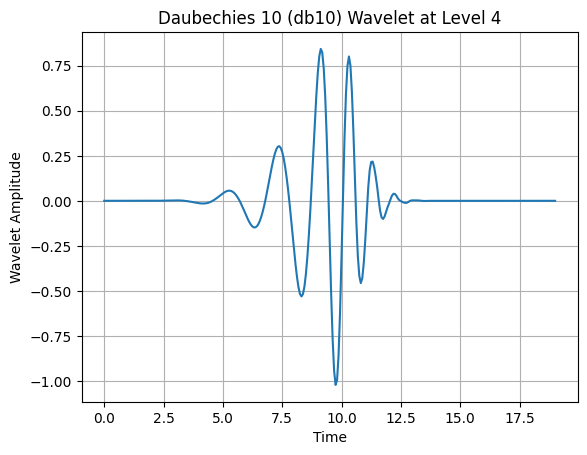

In [21]:
import pywt
import matplotlib.pyplot as plt

# Get the wavelet function (scaling function and wavelet) at level 4
phi, psi, x = pywt.Wavelet('db10').wavefun(level=4)

# Plot the wavelet function
plt.plot(x, psi)
plt.xlabel('Time')
plt.ylabel('Wavelet Amplitude')
plt.title('Daubechies 10 (db10) Wavelet at Level 4')
plt.grid(True)
plt.show()


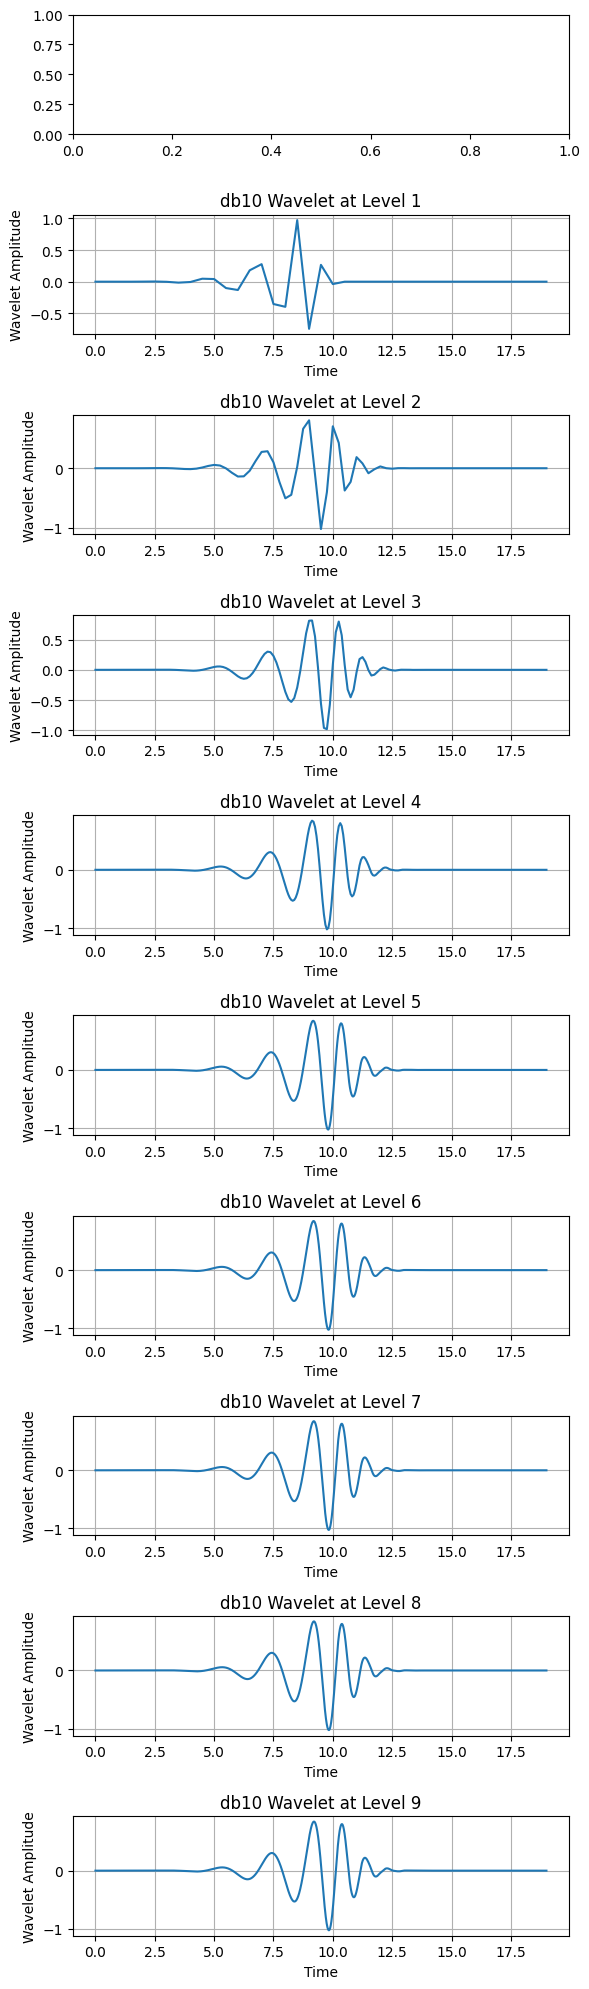

In [22]:
import pywt
import matplotlib.pyplot as plt

# Define the wavelet name ('db10')
wavelet_name = 'db10'

# Create a figure to display the wavelets
fig, axs = plt.subplots(10, 1, figsize=(6, 20))

# Iterate through levels 0 to 4
for level in range(1,10):
    # Get the wavelet function (scaling function and wavelet) at the specified level
    phi, psi, x = pywt.Wavelet(wavelet_name).wavefun(level=level)

    # Plot the wavelet function
    axs[level].plot(x, psi)
    axs[level].set_title(f"{wavelet_name} Wavelet at Level {level}")
    axs[level].set_xlabel('Time')
    axs[level].set_ylabel('Wavelet Amplitude')
    axs[level].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
lpf , hpf = pywt.Wavelet(wavelet_type).filter_bank[:2]

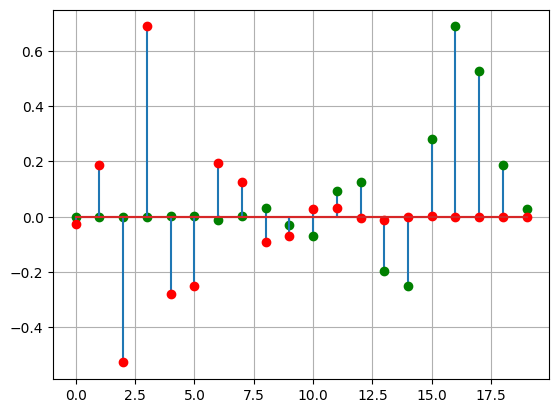

In [24]:
plt.stem(lpf , markerfmt = 'go')
plt.stem(hpf, markerfmt = 'ro')
plt.grid(True)
plt.show()

#CWT

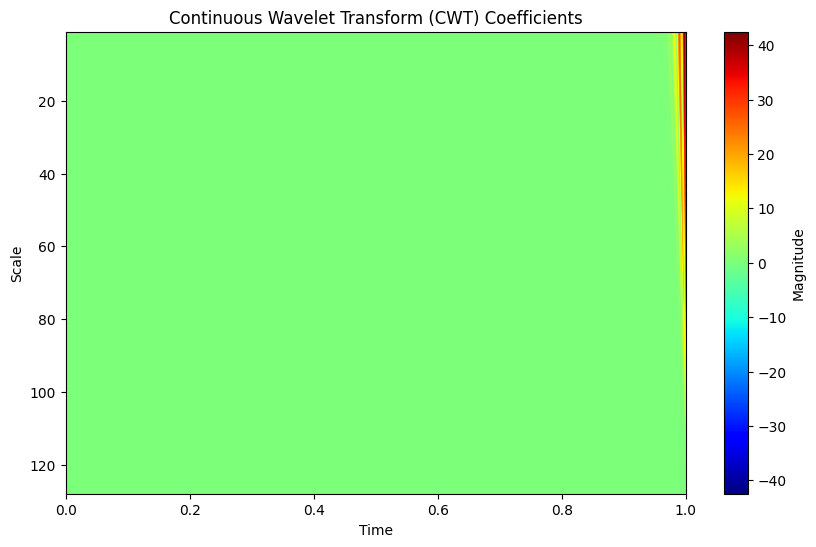

In [25]:
# Define wavelet parameters
wavelet = 'morl'  # Morlet wavelet
scales = np.arange(1, 128)  # Scales for CWT

# Perform Continuous Wavelet Transform (CWT)
coeffs, freqs = pywt.cwt(x, scales, wavelet)

# Plot CWT coefficients
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coeffs), extent=[0, 1, 1, 128], cmap='jet', aspect='auto', vmax=abs(coeffs).max(), vmin=-abs(coeffs).max())  # Plot magnitude of coefficients
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT) Coefficients')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.gca().invert_yaxis()  # Invert y-axis to match convention (low scales at the bottom)
plt.show()


In [27]:
coeffs.shape , freqs.shape

((127, 9729), (127,))

# transfer learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Function to generate time series data
def generate_time_series(num_samples, num_samples_per_series, num_classes):
    X = []
    y = []
    for i in range(num_samples):
        if i%2 == 0:
            # Class 0: Single sinus signal
            signal = np.sin(2 * np.pi * np.linspace(0, 1, num_samples_per_series))
        else:
            # Class 1: Two sinus signals
            signal = np.sin(2 * np.pi * np.linspace(0, 2, num_samples_per_series)) + np.sin(2 * np.pi * np.linspace(0, 4, num_samples_per_series))
        X.append(signal)
        y.append(int(i%2))
    return np.array(X), np.array(y)

# Function to convert time series to CWT images
def time_series_to_cwt_images(X, num_frequencies):
    images = []
    for series in X:
        coeffs, _ = pywt.cwt(series, np.arange(1, num_frequencies+1), 'morl')
        images.append(coeffs)
    return np.array(images)

# Generate time series data
num_samples = 1000
num_samples_per_series = 32
num_classes = 2
X, y = generate_time_series(num_samples, num_samples_per_series, num_classes)

# Convert time series to CWT images
num_frequencies = 224
X_images = time_series_to_cwt_images(X, num_frequencies)


In [3]:
# Create a 2D array (grayscale image)
X = []
y_tmp = y
y = []
for i in range(len(X_images)):
  intensity_array = X_images[i]

  cmap = 'jet'  # Example colormap, you can choose any other colormap
  normalized_intensity_array = (intensity_array - intensity_array.min()) / (intensity_array.max() - intensity_array.min())

  # Repeat each column 7 times to stretch the second axis from 32 to 224
  stretched_intensity_array = np.repeat(normalized_intensity_array, 7, axis=1)

  # Convert intensity array to RGB image
  #rgb_image = np.stack([stretched_intensity_array] * 3, axis=-1)  # Create 3 channels with the same intensity values
  rgb_image = plt.cm.get_cmap(cmap)(stretched_intensity_array)

  X.append(rgb_image[:,:,:3])
  y.append(y_tmp[i])


<ipython-input-3-f14e93025497>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rgb_image = plt.cm.get_cmap(cmap)(stretched_intensity_array)


In [4]:
X[0].shape ,  X_images[0].shape

((224, 224, 3), (224, 32))

In [5]:
X = np.array(X)
y = np.array(y)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [8]:
X_train[0].shape , y_train[0].shape , type(y_train) , len(X_train), len(y_train)

((224, 224, 3), (), numpy.ndarray, 800, 800)

In [9]:
import kagglehub

# Download latest version
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector")

print("Path to model files:", path)

Path to model files: /root/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector/4


In [10]:
import shutil

# Source directory path
source_dir = path

# Destination directory path
destination_dir = '/content/1'

# Copy the directory from source to destination
shutil.copytree(source_dir, destination_dir)


FileExistsError: [Errno 17] File exists: '/content/1'

In [13]:
#feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
#feature_extractor_model = '/root/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector/4'
feature_extractor_model = '/content/1'
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)
num_of_flowers = 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 64)                81984     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 2340098 (8.93 MB)
Trainable params: 82114 (320.76 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=10 , batch_size=32)

Epoch 1/10
25/25 [==============================] - 8s 39ms/step - loss: 0.8242 - acc: 0.5688
Epoch 2/10
25/25 [==============================] - 1s 39ms/step - loss: 0.6056 - acc: 0.7362
Epoch 3/10
25/25 [==============================] - 1s 39ms/step - loss: 0.4807 - acc: 0.9000
Epoch 4/10
25/25 [==============================] - 1s 39ms/step - loss: 0.4085 - acc: 0.9613
Epoch 5/10
25/25 [==============================] - 1s 39ms/step - loss: 0.3588 - acc: 0.9162
Epoch 6/10
25/25 [==============================] - 1s 39ms/step - loss: 0.2603 - acc: 1.0000
Epoch 7/10
25/25 [==============================] - 1s 38ms/step - loss: 0.1811 - acc: 1.0000
Epoch 8/10
25/25 [==============================] - 1s 38ms/step - loss: 0.1368 - acc: 1.0000
Epoch 9/10
25/25 [==============================] - 1s 39ms/step - loss: 0.1077 - acc: 1.0000
Epoch 10/10
25/25 [==============================] - 1s 38ms/step - loss: 0.0790 - acc: 1.0000


In [15]:
model.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 2s 148ms/step - loss: 0.0730 - acc: 1.0000


[0.07299275696277618, 1.0]

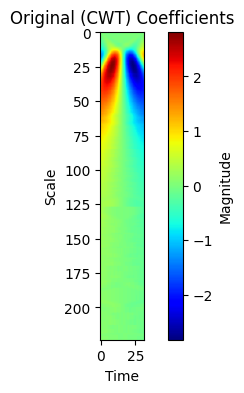

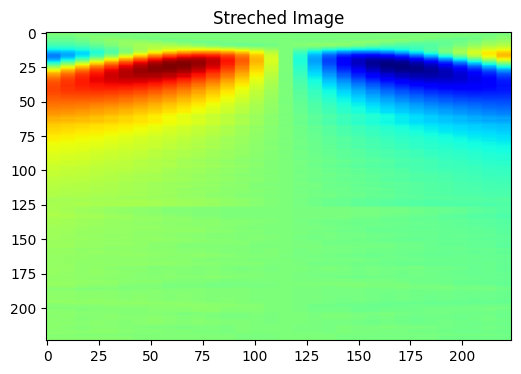

In [16]:
# image index
image_index = 0

plt.figure(figsize=(6, 4))
plt.imshow(X_images[image_index],  cmap='jet')# , origin='lower')#, aspect='auto', vmax=abs(X_images[1]).max(), vmin=-abs(X_images[1]).max())  # Plot magnitude of coefficients
plt.colorbar(label='Magnitude')
plt.title('Original (CWT) Coefficients')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.figure(figsize=(6, 4))
plt.title('Streched Image')
plt.imshow(X[image_index] ,cmap='jet', aspect='auto', vmax=abs(X[image_index]).max(), vmin=-abs(X[image_index]).max())
plt.show()


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

# Define image dimensions
img_width, img_height = 224, 224

# Load the pre-trained VGG16 model without the top layers
base_model = EfficientNetV2L(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 new classes
])

model.summary()

# Compile the model
model.compile(optimizer=Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Function  (None, 7, 7, 1280)        117746848 
 al)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_14 (Dense)            (None, 64)                4014144   
                                                                 
 dense_15 (Dense)            (None, 2)                 130       
                                                                 
Total params: 121761122 (464.48 MB)
Trainable params: 4014274 (15.31 MB)
Non-trainable params: 117746848 (449.17 MB)
_________________________________________________________________
Epoch 1/20
25/25 [==============================] - 36s 375ms/step - 

In [18]:
counts = np.bincount(y_train)
counts , len(y_train)

(array([403, 397]), 800)

In [19]:
counts = np.bincount(y_test)
counts , len(y_test)

(array([ 97, 103]), 200)